<a href="https://colab.research.google.com/github/dalatorrem/Diplomado_Metodos_UCentral_2023/blob/main/Lectura_18_Intervalos_definiciones_simulaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

<p align="center">
  <img src="https://raw.githubusercontent.com/lacamposm/Diplomado_Metodos_UCentral/main/data/images/imagen_ucentral.jpg" alt="logo_Ucentral" width="400px" height="300px">
</p>

In [2]:
%%capture
!pip install pingouin ## instalación libreria pingouin

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, nct, norm   ## distribuciones t y t no-central.
from pingouin import ttest       ## ttest: prueba-t
##
sns.set_style("darkgrid")
##
url_base= "https://raw.githubusercontent.com/lacamposm/Fundamentos_Analitica/main/data/"

# Intervalo de confianza

Se pueden realizar estimaciones puntuales y estimaciones por intervalo, en este caso trataremos los intervalos de confianza:

Un intervalo de confianza de $(1-\alpha ) \%$ para estimar  $\theta$  un parámetro poblacional, donde  que sigue una determinada distribución de probabilidad, es una expresión del tipo $[\theta_1, \theta_2]$
tal que
$$P (\theta_1 \leq \theta \leq \theta_2)= (1-\alpha)\%$$
 donde $P$ es la función de distribución de probabilidad de $\theta$.

## Ejemplos

Intervalo de confianza para la media de una población normal cuya varianza es conocida

 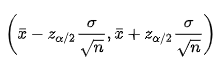

El intervalo de confianza para estimar una proporción

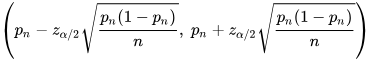

Intervalo de confianza para la media

$$\bar{x}-t_{\alpha/2}\dfrac{s}{\sqrt{n}}<\mu<\bar{x}-t_{\alpha/2}\dfrac{s}{\sqrt{n}}$$

# Simulaciones Clase

## Intervalo de confianza para la media de una población normal cuya varianza es conocida

In [20]:
def conseg_interv_conf_media_var_con(muestra, alpha, varianza, print_m = False):
  n = len(muestra)
  x_barra = muestra.mean()
  confianza_porcentaje = 100*(1-alpha)
  if print_m:
    print(f'Confianza del {confianza_porcentaje}%')
  sigma = varianza**0.5 # raíz cuadrada
  z_alpha_medios = norm.ppf(1-alpha/2)
  if print_m:
    print(f'Z_alpha/2 es: {round(z_alpha_medios,3)}')
  desv_punto_medio = z_alpha_medios*(sigma/np.sqrt(n))
  lim_inf = x_barra - desv_punto_medio
  lim_sup = x_barra + desv_punto_medio
  return lim_inf, lim_sup

In [38]:
muestra = pd.Series([2,3,4,5])
alpha = 0.001
varianza = 1
conseg_interv_conf_media_var_con(muestra, alpha, varianza, print_m=True)

Confianza del 99.9%
Z_alpha/2 es: 3.291


(1.8547366342540372, 5.145263365745963)

In [102]:
size_sample = 50
no_simulaciones = 1000
media_poblacional = 1500
varianza_poblacional = 900
alpha = 0.001
print(f'Confianza del {100*(1-alpha)}%')
simulacion_df = list()
for i in range(no_simulaciones):
  muestra_aleatoria = np.random.normal(media_poblacional, varianza_poblacional**0.5, size_sample)
  lim_inf, lim_sup = conseg_interv_conf_media_var_con(muestra_aleatoria, alpha, varianza_poblacional)
  simulacion_df.append([len(muestra_aleatoria),
                        muestra_aleatoria.mean(),
                        lim_inf,
                        lim_sup])
simulacion_df = pd.DataFrame(np.array(simulacion_df), columns= ['n','mean_sample', 'lim_inf', 'lim_sup'])
simulacion_df['ID_SAMPLE'] = np.arange(no_simulaciones) + 1
simulacion_df['FLAG_REV_PAR'] = 1*((simulacion_df['lim_inf']<media_poblacional) & (simulacion_df['lim_sup']>media_poblacional))
100*simulacion_df['FLAG_REV_PAR'].value_counts(1)

Confianza del 99.9%


1    99.8
0     0.2
Name: FLAG_REV_PAR, dtype: float64

In [103]:
simulacion_df

,n,mean_sample,lim_inf,lim_sup,ID_SAMPLE,FLAG_REV_PAR
0,50.0,1504.355283,1490.394761,1518.315806,1,1
1,50.0,1498.301628,1484.341105,1512.262150,2,1
2,50.0,1502.260127,1488.299604,1516.220649,3,1
3,50.0,1503.411171,1489.450648,1517.371693,4,1
4,50.0,1491.632717,1477.672194,1505.593239,5,1
...,...,...,...,...,...,...
995,50.0,1494.223689,1480.263166,1508.184211,996,1
996,50.0,1503.737410,1489.776888,1517.697933,997,1
997,50.0,1487.877564,1473.917041,1501.838086,998,1
998,50.0,1494.481910,1480.521387,1508.442432,999,1


<Axes: >

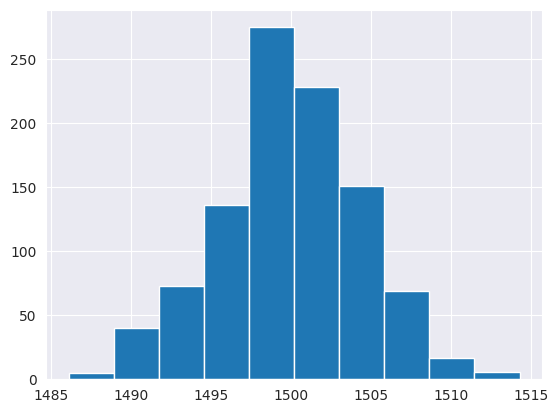

In [104]:
simulacion_df['mean_sample'].hist()

In [105]:
(simulacion_df['lim_inf'] + simulacion_df['lim_sup'])/2 - simulacion_df['mean_sample']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Length: 1000, dtype: float64

<Axes: >

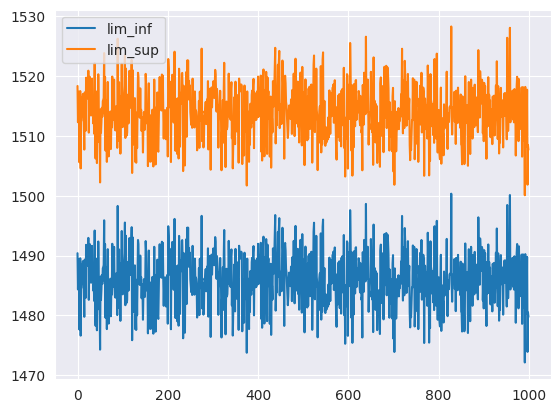

In [106]:
simulacion_df[['lim_inf', 'lim_sup']].plot()

*** Revisón de que el parámetro real esté dentro del intervalo***

In [107]:
100*simulacion_df['FLAG_REV_PAR'].value_counts(1)

1    99.8
0     0.2
Name: FLAG_REV_PAR, dtype: float64

**Conclusiones**

* A mayor varianza o a mayor desviación estándar, el intervalo de confianza es más grande, con alpha (o confianza) y tamaño de la muestra fijas.

* A menor tamaño de la muestra el intervalo es más grande, , con alpha (o confianza) y varianza (o desviación estándar) fijas.

* A mayor confianza (o menor alpha) el intervalo es más grande, con varianza y tamaño fijos.

Recuerde que en la práctica el valor que se puede escoger es el tamaño de la muestra.





## Intervalo de confianza para la proporción de una población

In [118]:
muestra = pd.Series([1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,0,
                     1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,0,
                     1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,0,
                     1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,0,
                     1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,0,
                     1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,0,
                     1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,0,
                     1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,0,
                     1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,0,
                     1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,0,
                     1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,0,
                     1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,0,
                     1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,0,
                     1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,0]*10000)
alpha = 0.01
varianza = muestra.std(ddof=0)**2
l_inf, l_sup = conseg_interv_conf_media_var_con(muestra, alpha, varianza, print_m=True)
l_inf, l_sup, l_sup- l_inf

Confianza del 99.0%
Z_alpha/2 es: 2.576


(0.5855772872311171, 0.586836505872331, 0.0012592186412139217)

In [119]:
alpha = 0.1
varianza = muestra.std(ddof=0)**2
l_inf, l_sup = conseg_interv_conf_media_var_con(muestra, alpha, varianza, print_m=True)
l_inf, l_sup, l_sup - l_inf

Confianza del 90.0%
Z_alpha/2 es: 1.645


(0.5858048453858584, 0.5866089477175898, 0.0008041023317313378)

## ***Ejemplo Datos Reales.***

En la reserva hay 390.955 árboles de los que disponemos de datos censales. La altura media de todos esos árboles es de 57,35 pies (17,5 metros). Por lo tanto, decimos que la **población** consta de 390.955 árboles, y que la **media poblacional** de la altura de los árboles es de 57,35 pies (es decir, la media de la altura de todos los árboles de la población es de 57,35 pies). Denotaremos la media de la población como la letra griega $\mu$.


In [120]:
censo = pd.read_csv(url_base + "censo.csv", names=["ID","CN", "HT"], header=0,
                    usecols=["CN","HT"])
display(censo.head())
print("\nTamaño de la población:", censo.shape[0])

,CN,HT
0,248587121489998,35.0
1,8888777010901,37.0
2,449560175489998,51.0
3,449558216489998,45.0
4,23220187010497,39.0



Tamaño de la población: 390955


In [126]:
alpha = 0.01

In [127]:
mu_california = 30
ttest(censo['HT'].sample(100),mu_california, confidence=1-alpha)

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,5.699565,84,two-sided,1.737676e-07,"[43.31283802026775, 66.21657374443814]",0.618205,7.574e+04,0.99988


**El intervalo de confianza NO DEPENDE de mu_california**

p-valor > $\alpha$   entonces no hay evidencia para rechazar.

$H_0$: $\mu=30$ <br>
$H_1$: $\mu \neq 30$